In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
plt.rcParams['figure.dpi'] = 150
np.set_printoptions(precision=4, suppress=True)
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
# this function pretty prints data frames in the PDF export
# e.g., display_table(df) pretty prints df in the PDF export
import warnings
def display_table(x):
    with warnings.catch_warnings() and pd.option_context('display.latex.repr', True):
        warnings.simplefilter(action='ignore', category=FutureWarning)
        display(x)

# Read Asset Returns Data

***Loading and reading*** project-1-data(1).csv file into dataframe(assets)

In [ ]:
assets = pd.read_csv('project-1-data(1).csv', index_col = ['Date'], parse_dates=True)

Using ***describe.()*** function to capture mean and standard deviation of each asset

In [ ]:
assetview = pd.DataFrame(assets.describe()).transpose()

Display assetview 

In [ ]:
assetview

,count,mean,std,min,25%,50%,75%,max
A,"10,431.0000",0.0003,0.0250,-0.0806,-0.0163,0.0005,0.0171,0.0955
B,"10,431.0000",0.0004,0.0224,-0.0845,-0.0149,0.0006,0.0156,0.1021
C,"10,431.0000",0.0006,0.0226,-0.1084,-0.0145,0.0009,0.0157,0.0926
D,"10,431.0000",0.0005,0.0227,-0.0921,-0.0148,0.0004,0.0152,0.1184
E,"10,431.0000",0.0002,0.0150,-0.0569,-0.0099,0.0001,0.0102,0.0488


# Rank Assets by Risk-Return Profiles

Calculate the ***Sharpe Ratio*** of each asset with Sharpe Ratio formula: $$SR = \frac{{R - R_F}}{\sigma}$$  And appending 'sharpe ratio' as a column to 'assetview'

In [ ]:
assetview['sharpe_ratio'] = (assetview.iloc[:,1].mul(252))/(assetview.iloc[:,2].mul(np.sqrt(252)))

Display 'assetview' with Sharpe Ratio:

In [ ]:
assetview

,count,mean,std,min,25%,50%,75%,max,sharpe_ratio
A,"10,431.0000",0.0003,0.0250,-0.0806,-0.0163,0.0005,0.0171,0.0955,0.2187
B,"10,431.0000",0.0004,0.0224,-0.0845,-0.0149,0.0006,0.0156,0.1021,0.2555
C,"10,431.0000",0.0006,0.0226,-0.1084,-0.0145,0.0009,0.0157,0.0926,0.4501
D,"10,431.0000",0.0005,0.0227,-0.0921,-0.0148,0.0004,0.0152,0.1184,0.3498
E,"10,431.0000",0.0002,0.0150,-0.0569,-0.0099,0.0001,0.0102,0.0488,0.2045


Creating dataframe (assetview2) to display Sharpe ratios in descending order: 

In [ ]:
assetview2 = pd.DataFrame(assetview.loc[:,'sharpe_ratio'])
pd.DataFrame(assetview2['sharpe_ratio'].sort_values(ascending = False))

,sharpe_ratio
C,0.4501
D,0.3498
B,0.2555
A,0.2187
E,0.2045


Calculating the ***Skewness*** of each asset using .skew() function

In [ ]:
skew = pd.DataFrame(np.log1p(assets).skew())
skew.columns = ['Skew']

Display ***Skewness*** for Asset A, B, C, D, E

In [ ]:
skew

,Skew
A,-0.0997
B,-0.0682
C,-0.1768
D,0.0462
E,-0.0171


Caulculating the ***Kurtosis*** of each asset using .kurt() function

In [ ]:
kurtosis = pd.DataFrame(np.log1p(assets).kurt())
kurtosis.columns = ['Kurtosis']

Display ***Kurtosis*** for Asset A, B, C, D, E

In [ ]:
kurtosis

,Kurtosis
A,-0.0400
B,-0.0332
C,0.4088
D,0.3671
E,-0.0553


Creating a dataframe contains sharpe_ratio, Kurtisos, Skewness, named 'combined' & Calculating the ***Adjusted Sharpe Ratio*** and append it as a column to dataframe 'combined'. The adjusted sharpe ratio adjusts the regular sharpe ratio to more holistically incorporate the effects of negative skew and excess kurtosis

In [ ]:
combined = pd.concat([assetview2,kurtosis,skew], axis=1)
# Adding the Adjusted Sharpe Ratio to combined:
combined['Adjusted_Sharpe'] = combined.apply(lambda row: row.sharpe_ratio*(1+(row.Skew/6)*row.sharpe_ratio-((row.Kurtosis-3)/24)*row.sharpe_ratio**2), axis=1)                                           

Display 'combined'

In [ ]:
combined

,sharpe_ratio,Kurtosis,Skew,Adjusted_Sharpe
A,0.2187,-0.0400,-0.0997,0.2192
B,0.2555,-0.0332,-0.0682,0.2569
C,0.4501,0.4088,-0.1768,0.4540
D,0.3498,0.3671,0.0462,0.3555
E,0.2045,-0.0553,-0.0171,0.2054


In [ ]:
pd.DataFrame(combined['Adjusted_Sharpe'].sort_values(ascending = False))

,Adjusted_Sharpe
C,0.4540
D,0.3555
B,0.2569
A,0.2192
E,0.2054


After adjusting for skew and Kurtosis, these rankings remain in the original sharpe ratio order. This shows the risk adjusted returns of each asset. One of the known limitations of the sharpe ratio is its assumption of a normal distribution of returns, which does not account for the negative skew on the downside and therefore can misunderstand risks. Though the adjusted sharpe ratio proposed in 2006 tries to offset this by adding in skew and excess kurtosis, this is still a proxy and the calculation still relies on the original sharpe formula. Additionally, using historical data to project into the future has inherent risk, future returns and volatility are not consistently predictable, so making investment decisions based on these data could be disastrous.

Calculating the ***Total Return*** of each asset

In [ ]:
def totret(x):
    return (1+x).prod() - 1
totalret = pd.DataFrame(assets.loc[:, ['A', 'B', 'C', 'D', 'E']].apply(totret))
totalret.columns = ["Total Return"]
totalret

,Total Return
A,0.3889
B,2.1469
C,54.6253
D,11.6180
E,1.3205


# Create A Portfolio with An Even Better Risk-Return Profile

Displaying ***Correlation Matrix*** with .corr() function

In [ ]:
corr_matrix = assets.corr()
corr_matrix 

,A,B,C,D,E
A,1.0000,0.4456,0.4469,0.4413,-1.0000
B,0.4456,1.0000,0.1918,0.1958,-0.4456
C,0.4469,0.1918,1.0000,0.2048,-0.4469
D,0.4413,0.1958,0.2048,1.0000,-0.4413
E,-1.0000,-0.4456,-0.4469,-0.4413,1.0000


With this correlation matrix, ***A*** and ***E*** have a correlation of -1 meaning we could be able to maximize the sharpe ratio using a combination of asset A and E in our portfolio as it offers a perfect hedge

Displaying the ***Covariance Matrix*** of assets

In [ ]:
cov_matrix = assets.cov()
cov_matrix

,A,B,C,D,E
A,0.0006,0.0002,0.0003,0.0003,-0.0004
B,0.0002,0.0005,0.0001,0.0001,-0.0001
C,0.0003,0.0001,0.0005,0.0001,-0.0002
D,0.0003,0.0001,0.0001,0.0005,-0.0002
E,-0.0004,-0.0001,-0.0002,-0.0002,0.0002


Using portfolio variance function to calculate the Sharpe Ratio of A&E:

$$PortfolioVariance = w_1^2{\sigma}_1^2 + w_2^2{\sigma}_2^2+2*w_1 w_2 Cov(1,2)$$

In [ ]:
#Inputs:
w1 = .5
w2 = .5
Asset1 = 'A'
Asset2 = 'E'

#Calculations:
Portfolio_Var = w1 **2 * assetview.loc[Asset1,'std']**2 + w2**2 * assetview.loc[Asset2,'std']**2 + 2*w1*w2*cov_matrix.loc[Asset1,Asset2]
Portfolio_Std = np.sqrt(Portfolio_Var)
Portfolio_R = assetview.loc[Asset1,'mean']*w1 + assetview.loc[Asset2,'mean']*w2
Portfolio_Sharpe = (Portfolio_R*252)/(Portfolio_Std * np.sqrt(252))
print(str(Asset1)+" and "+str(Asset2)+" "+"Portfolio Sharpe Ratio: "+ str(Portfolio_Sharpe))

A and E Portfolio Sharpe Ratio: 0.8533421352117919


Sharpe ratio is used for investors to compare the return of the investment and its risks. Ideally, we want lower level of risks but higher return. Therefore, because the sharpe ratio is the ratio of return to risk, the higher the sharpe ratio is, the better for the investors. 
Among all asset combinations (2 assets per portfolio), the combination of asset A and E has the highest sharpe ratio. 

If you want to test any combinations out, change the above code's 'Asset1' and 'Asset2' values and rerun!

Computing the ***Cumulative Returns*** of Asset A & E

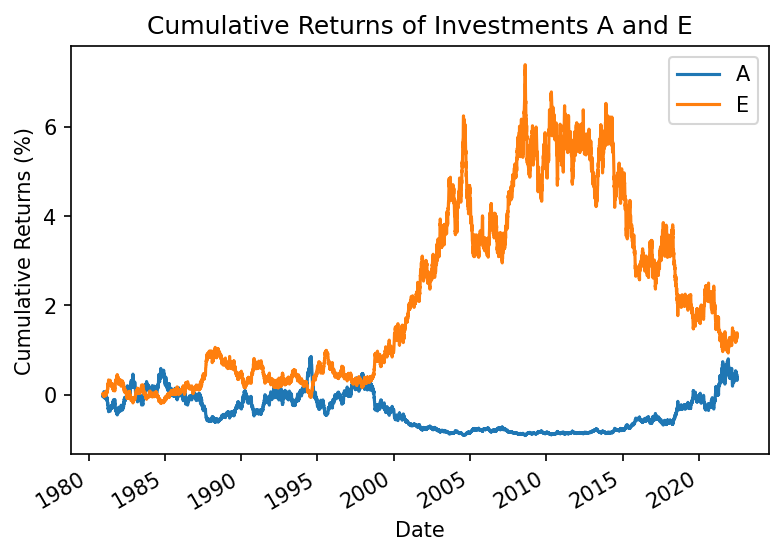

In [ ]:
_ = assets[['A', 'E']].dropna().add(1).cumprod().sub(1)
# AEPlot = _.plot()
_.plot()

plt.title('Cumulative Returns of Investments A and E')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.show()

Despite assets A and E having low individual sharpe ratios and lower returns over the period compared to the other tracked assets, they still create the highest portfolio sharpe ratio as their returns reflect a perfect hedge. As one asset increases, the other decreases, drastically decreasing the standard deviation of the portfolio and increasing the risk return profile of the portfolio. An obvious limitation of this portfolio could be the use of historical risk and return data, markets would have to move in a predictable manner moving forward to produce a similar risk/return profile. Also, the high sharpe ratio of the portfolio is driven by the -1 correlation of the underlying assets. Because correlation does not equal causation, assuming this correlation will hold in the future is problematic. 

***Leverage Effect*** with Asset A and Asset E

Leverage effect refers to the observed tendency of an asset's volatility to be negatively correlated to the asset's returns.

There is no observable correlation between average daily return and standard deviation for the optimal portfolio over the period

***Portfolio A and E:***

In [ ]:
assets['Optimal_portfolio']= assets['A']*.5+assets['E']*.5
assets

,A,B,C,D,E,Optimal_portfolio
Date,,,,,,
1980-12-12,-0.0292,-0.0235,-0.0089,-0.0057,0.0179,-0.0056
1980-12-15,0.0480,0.0457,0.0294,0.0405,-0.0284,0.0098
1980-12-16,-0.0266,-0.0197,-0.0212,-0.0170,0.0164,-0.0051
1980-12-17,0.0200,0.0184,0.0417,-0.0326,-0.0116,0.0042
1980-12-18,-0.0240,-0.0321,-0.0070,-0.0274,0.0148,-0.0046
...,...,...,...,...,...,...
2022-06-27,-0.0260,-0.0223,0.0082,0.0136,0.0160,-0.0050
2022-06-28,-0.0106,-0.0407,0.0076,-0.0169,0.0067,-0.0019
2022-06-29,-0.0281,-0.0312,-0.0145,0.0080,0.0172,-0.0054


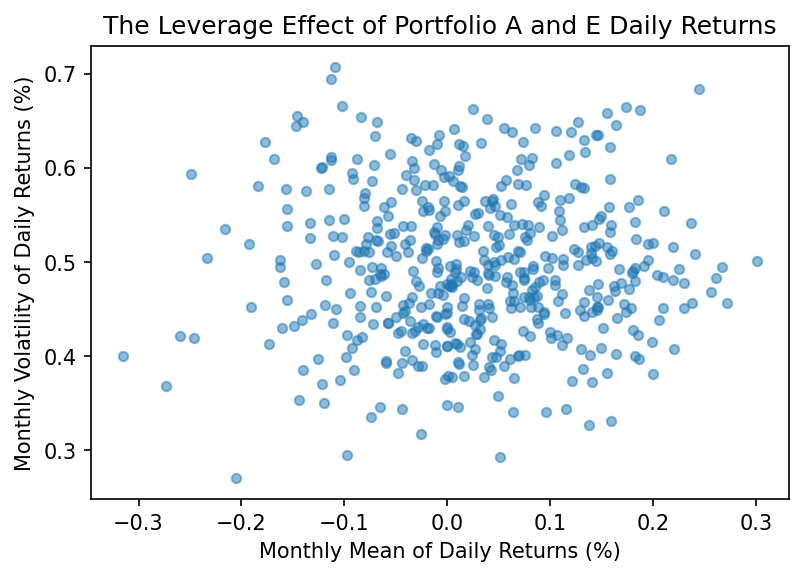

In [ ]:
assets_Port = assets['Optimal_portfolio'].resample(rule='M', kind='.').agg(['mean', 'std'])
assets_Port.mul(100).plot(x='mean', y='std', kind='scatter', alpha=0.5)
plt.xlabel('Monthly Mean of Daily Returns (%)')
plt.ylabel('Monthly Volatility of Daily Returns (%)')
plt.title('The Leverage Effect of Portfolio A and E Daily Returns')
plt.show()

The leverage graph above shows neither a positive nor negative relationship between the mean returns and volatility of the optimal portfolio which differs from the negative correlation typically observed.